In [10]:
import numpy as np
def get_flow_data(flow_file: str) -> np.array:   # 这个是载入流量数据,返回numpy的多维数组
    """
    :param flow_file: str, path of .npz file to save the traffic flow data
    :return:
        np.array(N, T, D)
    """
    data = np.load(flow_file)

    flow_data = data['data'].transpose([1, 0, 2])[:, :, :][:, :, np.newaxis]  # [N, T, D],transpose就是转置，让节点纬度在第0位，N为节点数，T为时间，D为节点特征
    # [:, :, 0]就是只取第一个特征，[:, :, np.newaxis]就是增加一个维度，因为：一般特征比一个多，即使是一个，保持这样的习惯，便于通用的处理问题

    return flow_data  # [N, T, D]

In [26]:
flow_file= "./data/PEMS04/PEMS04.npz"
csv_file = "./data/PEMS04/distance.csv"

In [27]:
# 3 features flow, occupy, speed

In [28]:
import pandas as pd
data = np.load(flow_file)
df = pd.read_csv(csv_file)

In [5]:
df.describe()

,from,to,cost
count,340.000000,340.000000,340.000000
mean,149.544118,146.241176,410.300588
std,88.341793,89.092511,257.518655
min,0.000000,0.000000,3.200000
25%,71.750000,66.750000,328.775000
50%,144.500000,139.500000,367.150000
75%,229.250000,226.500000,422.300000
max,305.000000,306.000000,2712.100000


In [4]:
df

,from,to,cost
0,73,5,352.6
1,5,154,347.2
2,154,263,392.9
3,263,56,440.8
4,56,96,374.6
...,...,...,...
335,46,216,353.6
336,217,98,411.7
337,98,31,3.2
338,217,46,354.0


In [25]:
data['data'].shape

(16992, 307, 3)

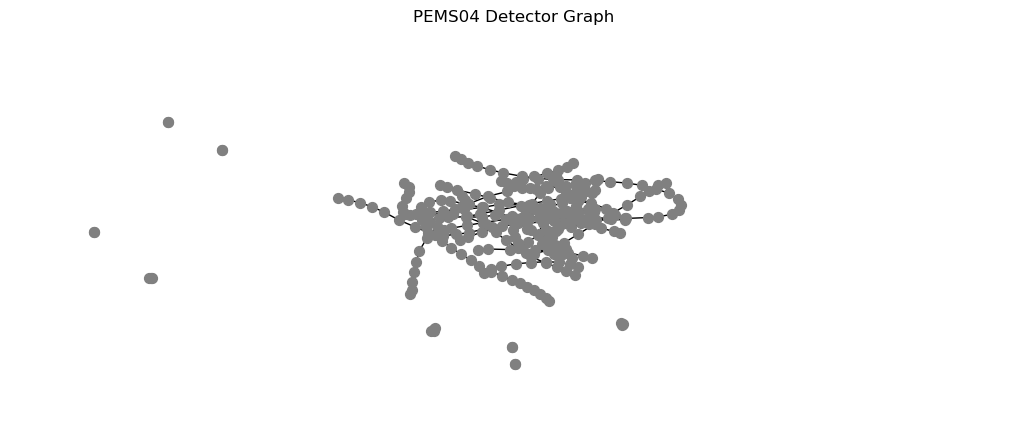

In [79]:
import matplotlib.pyplot as plt
import networkx as nx
plt.figure(figsize=(13, 5))
# Create a new NetworkX graph object
G = nx.Graph()

# Iterate over each row in the DataFrame and add nodes and edges to the graph
for i, row in df.iterrows():
    # Add the "from" node to the graph if it doesn't already exist
    if not G.has_node(row["from"]):
        G.add_node(row["from"])
    # Add the "to" node to the graph if it doesn't already exist
    if not G.has_node(row["to"]):
        G.add_node(row["to"])
    # Add the edge between the "from" and "to" nodes with the cost as the edge weight
    G.add_edge(row["from"], row["to"], weight=row["cost"])

# Set the node positions using the spring layout algorithm
pos = nx.spring_layout(G, seed=42)

# Draw the nodes with different colors and sizes
nx.draw_networkx_nodes(G, pos, node_color="grey", node_size=50)

# Draw the edges with different colors and widths
nx.draw_networkx_edges(G, pos, edge_color="black", width=1)

# Draw the edge labels with the cost as the label text
#edge_labels = nx.get_edge_attributes(G, "weight")

# Set the axis limits and turn off the axis labels and tick marks
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axis("off")

# Show the graph visualization
plt.title('PEMS04 Detector Graph')
plt.show()

In [80]:
import community.community_louvain as community
partition = community.best_partition(G)

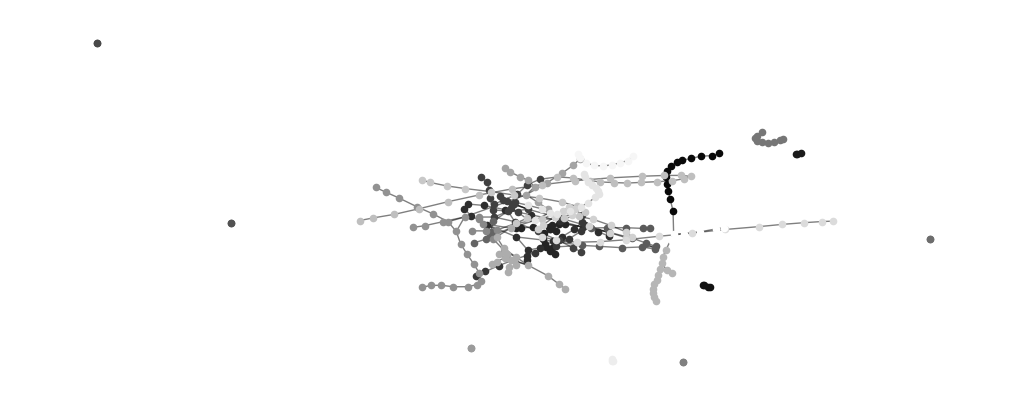

In [81]:
# Draw graph
plt.figure(figsize=(13, 5))
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()


In [82]:
community.generate_dendrogram(G)

[{73.0: 1,
  5.0: 1,
  154.0: 4,
  263.0: 4,
  56.0: 4,
  96.0: 5,
  42.0: 5,
  58.0: 9,
  95.0: 9,
  72.0: 9,
  271.0: 9,
  68.0: 9,
  134.0: 14,
  107.0: 14,
  130.0: 14,
  129.0: 14,
  227.0: 17,
  167.0: 17,
  298.0: 19,
  209.0: 19,
  146.0: 19,
  170.0: 19,
  173.0: 19,
  117.0: 23,
  0.0: 23,
  92.0: 25,
  243.0: 25,
  62.0: 25,
  203.0: 29,
  80.0: 29,
  97.0: 29,
  28.0: 29,
  57.0: 33,
  55.0: 33,
  223.0: 33,
  143.0: 38,
  269.0: 38,
  290.0: 38,
  110.0: 38,
  121.0: 38,
  299.0: 42,
  293.0: 42,
  148.0: 42,
  150.0: 44,
  152.0: 44,
  98.0: 45,
  70.0: 46,
  255.0: 46,
  128.0: 49,
  131.0: 49,
  132.0: 49,
  133.0: 38,
  242.0: 52,
  18.0: 52,
  43.0: 54,
  118.0: 54,
  207.0: 56,
  169.0: 56,
  127.0: 58,
  208.0: 58,
  297.0: 61,
  168.0: 61,
  166.0: 63,
  226.0: 63,
  13.0: 66,
  26.0: 66,
  94.0: 66,
  219.0: 66,
  217.0: 45,
  31.0: 71,
  215.0: 71,
  111.0: 71,
  116.0: 71,
  36.0: 73,
  78.0: 73,
  301.0: 75,
  20.0: 75,
  273.0: 78,
  138.0: 78,
  284.0: 78,
  

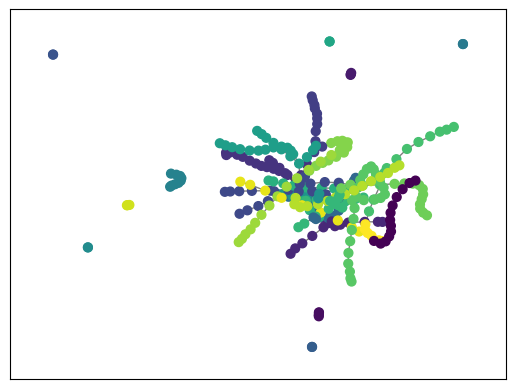

In [83]:
import matplotlib.cm as cm
# draw the graph
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [84]:
colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))

NameError: name 'sns' is not defined

In [85]:
import networkx as nx
import community

# Create your graph G here, e.g.

# Make a copy of the graph to avoid modifying the original graph
G_copy = G.copy()

# Apply the Louvain algorithm to detect communities
partition = community.best_partition(G_copy)

# Create subgraph and community dictionary for each community
subgraphs = {}
communities = {}
for node, community_id in partition.items():
    if community_id not in subgraphs:
        # Create a new subgraph for this community
        subgraphs[community_id] = nx.Graph()
    # Add node to subgraph for this community
    subgraphs[community_id].add_node(node)
    # Add node to community dictionary
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)

# Add edges to subgraphs for each community
for edge in G_copy.edges():
    node1, node2 = edge
    community1 = partition[node1]
    community2 = partition[node2]
    if community1 == community2:
        # The edge is within a community, add it to the subgraph for that community
        subgraphs[community1].add_edge(node1, node2)
    else:
        # The edge is between communities, add it to all subgraphs that contain the nodes
        for community_id in subgraphs:
            if node1 in subgraphs[community_id] and node2 in subgraphs[community_id]:
                subgraphs[community_id].add_edge(node1, node2)

# Print subgraph and community dictionary for each community
for community_id, subgraph in subgraphs.items():
    print("Community", community_id, ":", communities[community_id])
    print("Subgraph:", subgraph.edges())

# Output a dictionary with each community's nodes and edges
community_dict = {community_id: subgraphs[community_id].edges() for community_id in subgraphs}
print("Community dictionary:", community_dict)


Community 0 : [73.0, 5.0, 154.0, 263.0, 56.0, 96.0, 42.0, 58.0, 95.0, 72.0, 271.0, 68.0, 203.0, 80.0, 97.0, 28.0, 57.0, 55.0, 223.0]
Subgraph: [(73.0, 5.0), (5.0, 154.0), (154.0, 263.0), (263.0, 56.0), (56.0, 96.0), (96.0, 42.0), (42.0, 58.0), (58.0, 95.0), (95.0, 72.0), (72.0, 271.0), (271.0, 68.0), (68.0, 97.0), (68.0, 57.0), (203.0, 80.0), (80.0, 97.0), (97.0, 28.0), (28.0, 57.0), (57.0, 55.0), (55.0, 223.0)]
Community 1 : [134.0, 107.0, 130.0, 129.0]
Subgraph: [(134.0, 107.0), (107.0, 130.0), (130.0, 129.0)]
Community 3 : [227.0, 167.0, 298.0, 209.0, 146.0, 170.0, 173.0, 117.0, 0.0, 92.0, 243.0, 62.0]
Subgraph: [(227.0, 167.0), (167.0, 298.0), (298.0, 209.0), (209.0, 146.0), (146.0, 170.0), (170.0, 173.0), (173.0, 117.0), (117.0, 0.0), (0.0, 92.0), (92.0, 243.0), (243.0, 62.0)]
Community 5 : [143.0, 269.0, 290.0, 110.0, 121.0, 299.0, 293.0, 148.0, 150.0, 152.0, 133.0]
Subgraph: [(143.0, 269.0), (143.0, 133.0), (269.0, 290.0), (269.0, 133.0), (290.0, 110.0), (110.0, 121.0), (121.0, 

Induced graph for community 0 :


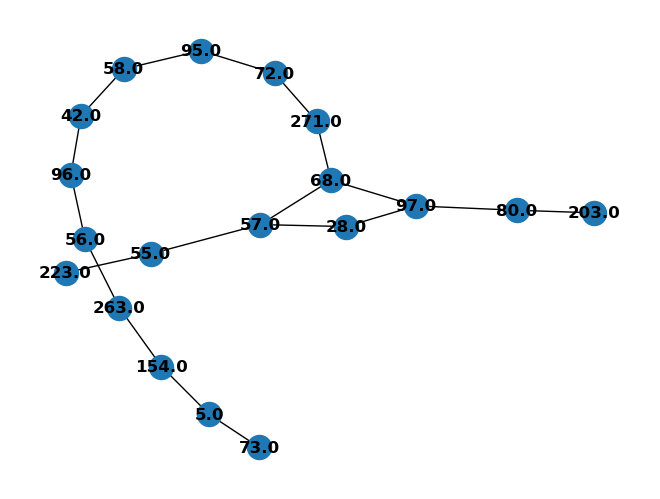

Induced graph for community 1 :


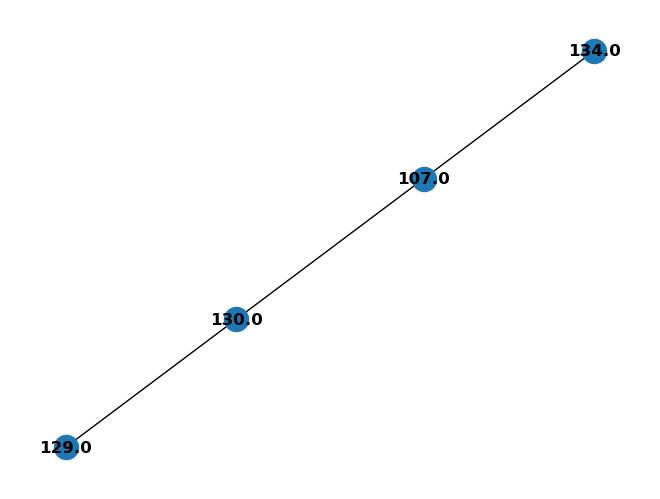

Induced graph for community 3 :


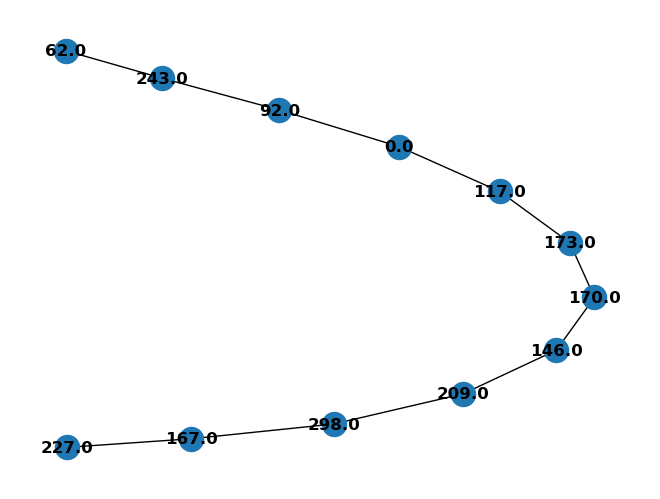

Induced graph for community 5 :


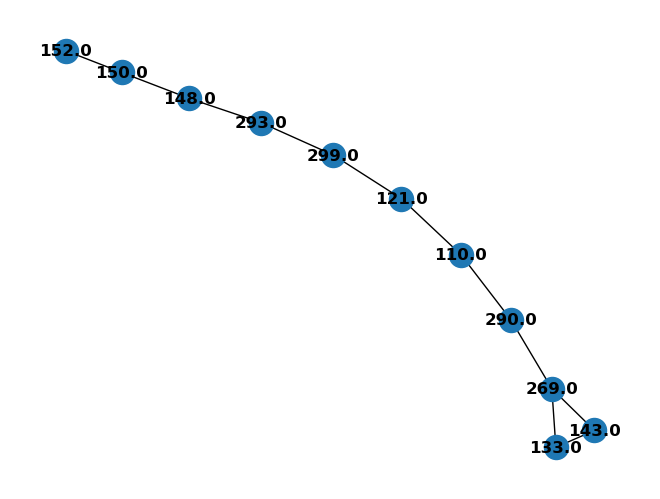

Induced graph for community 11 :


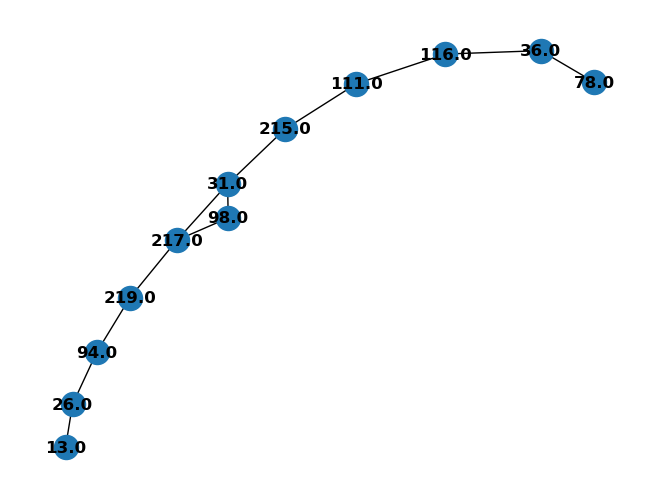

Induced graph for community 16 :


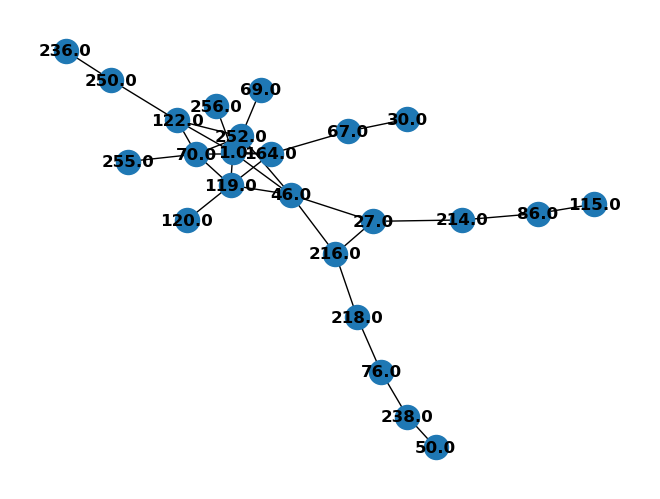

Induced graph for community 7 :


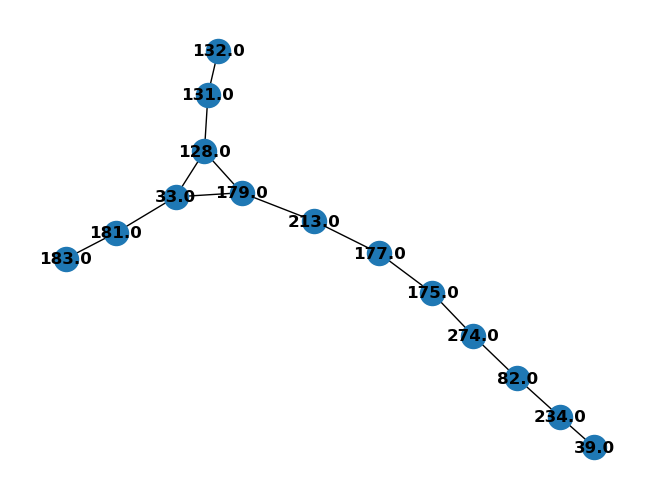

Induced graph for community 10 :


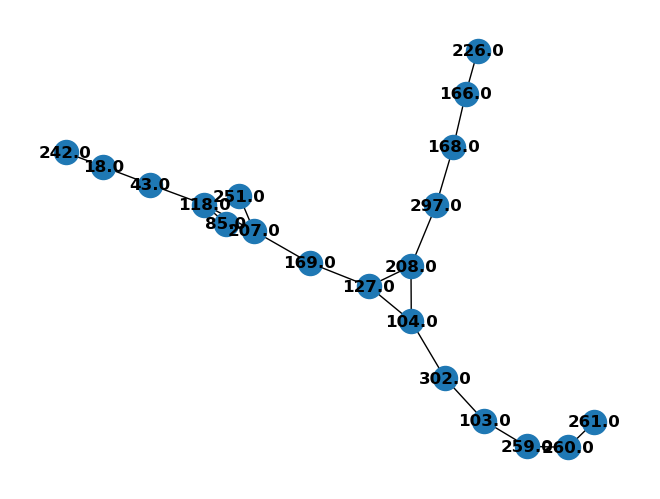

Induced graph for community 12 :


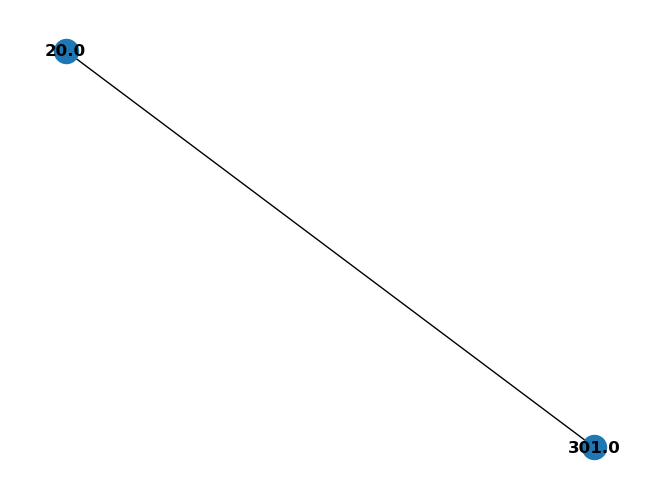

Induced graph for community 13 :


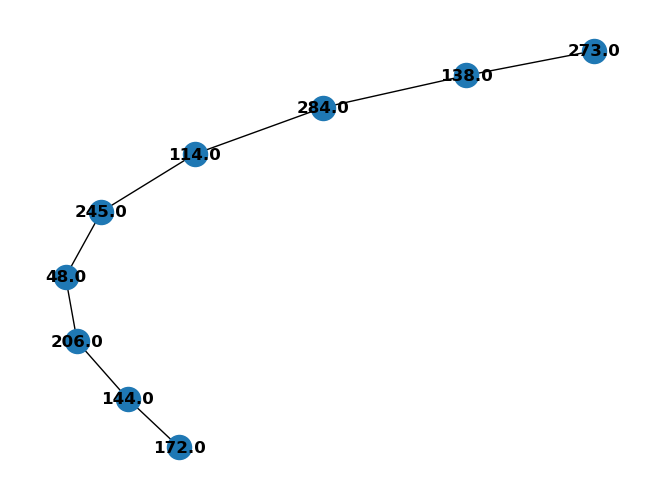

Induced graph for community 14 :


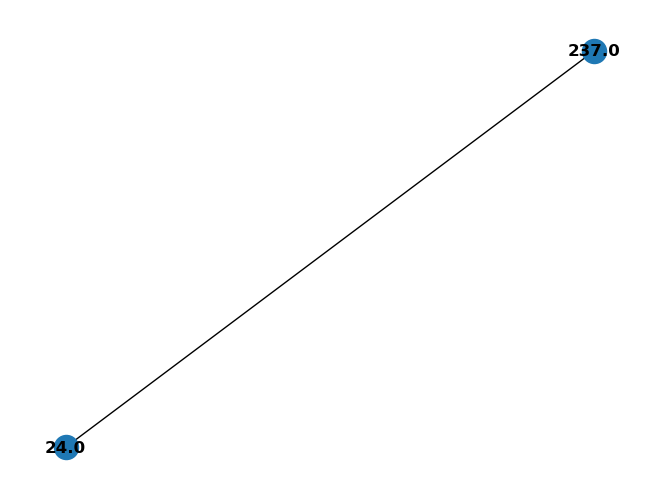

Induced graph for community 15 :


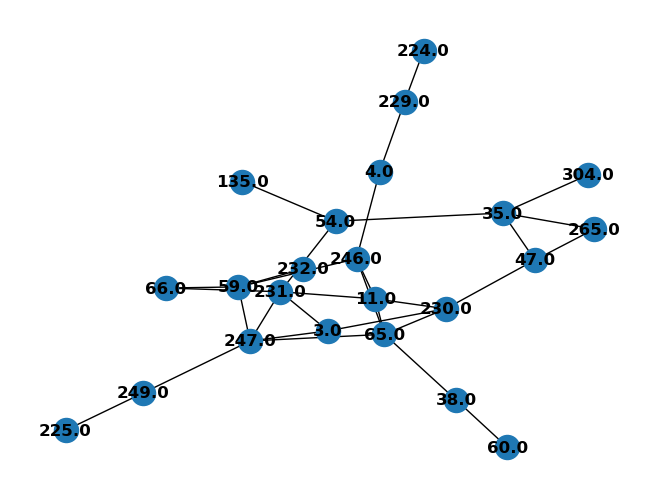

Induced graph for community 17 :


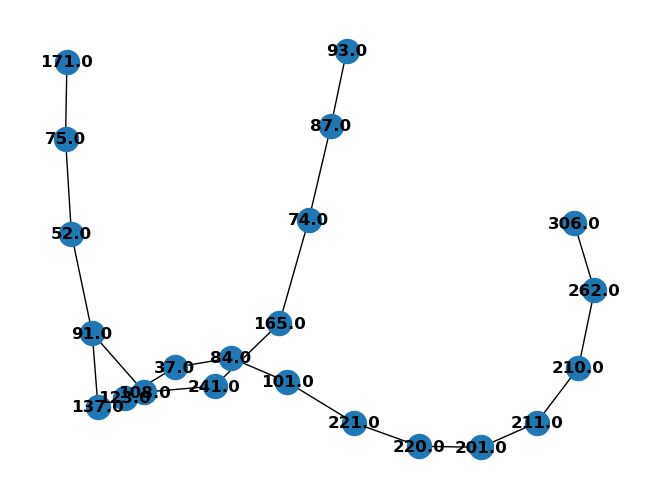

Induced graph for community 18 :


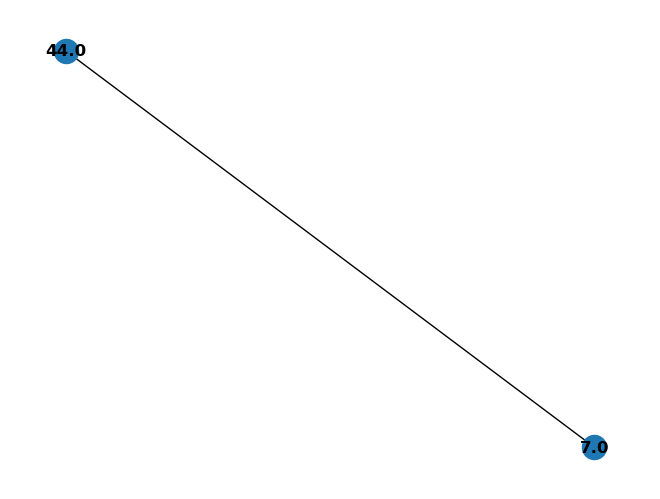

Induced graph for community 19 :


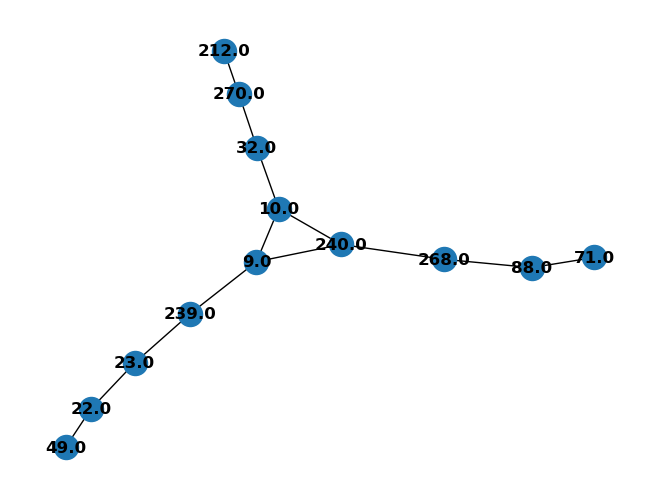

Induced graph for community 20 :


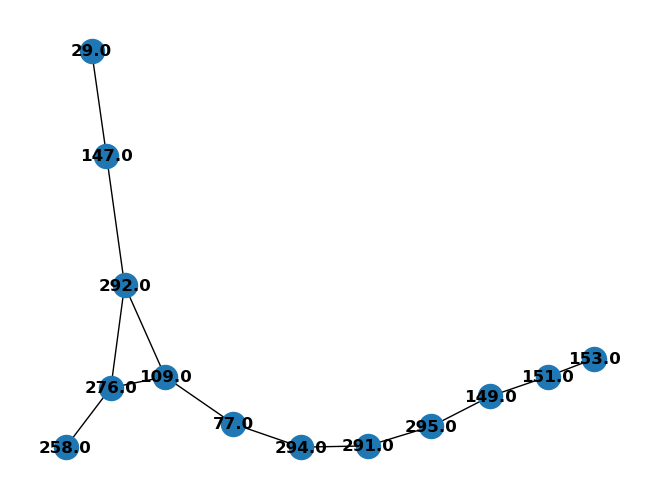

Induced graph for community 21 :


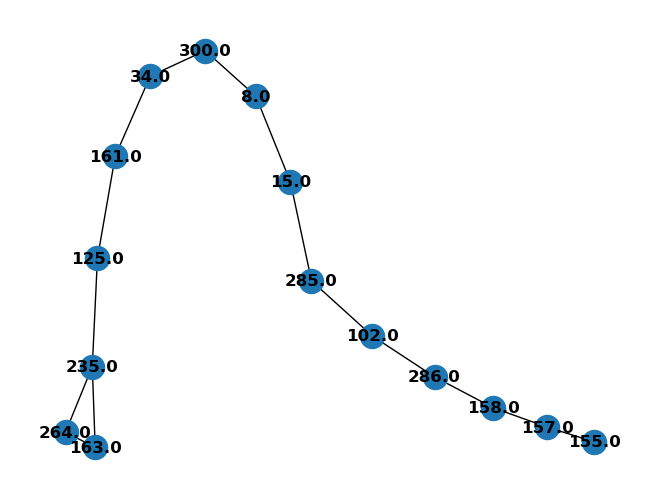

Induced graph for community 8 :


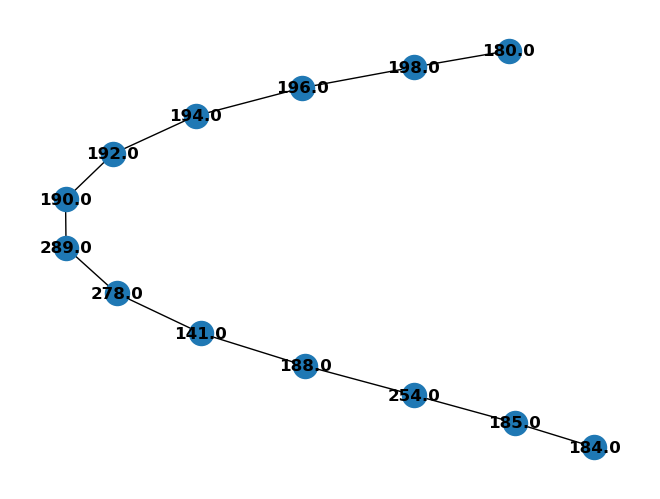

Induced graph for community 25 :


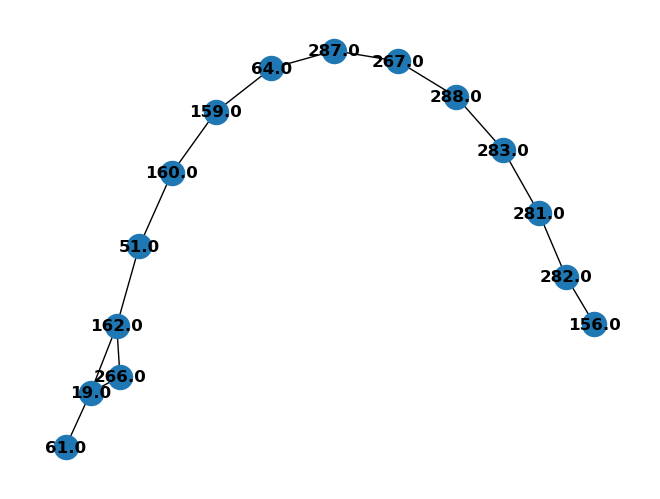

Induced graph for community 26 :


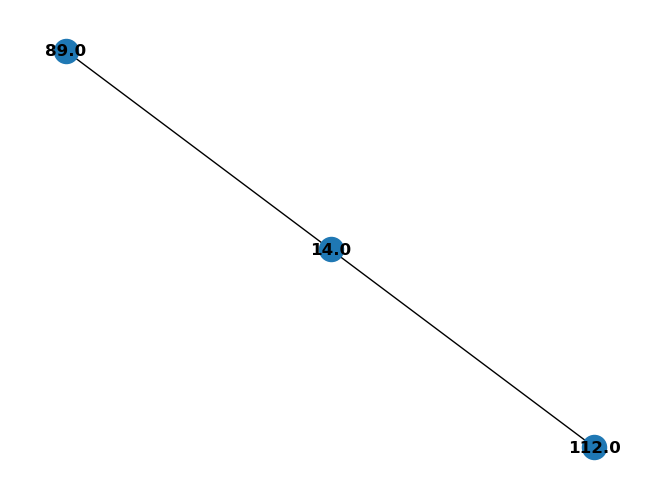

Induced graph for community 22 :


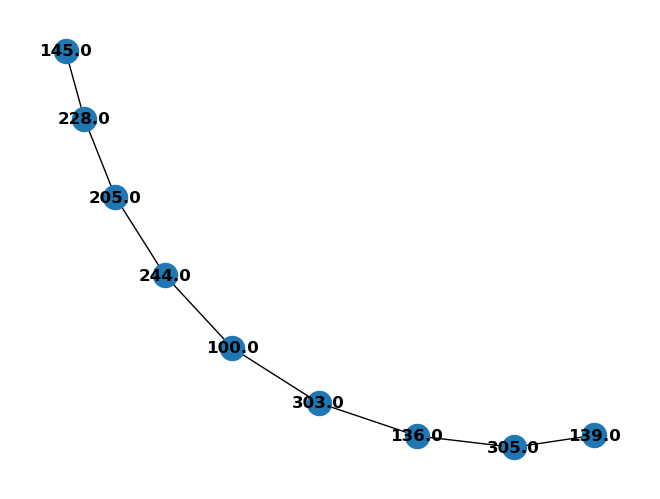

Induced graph for community 23 :


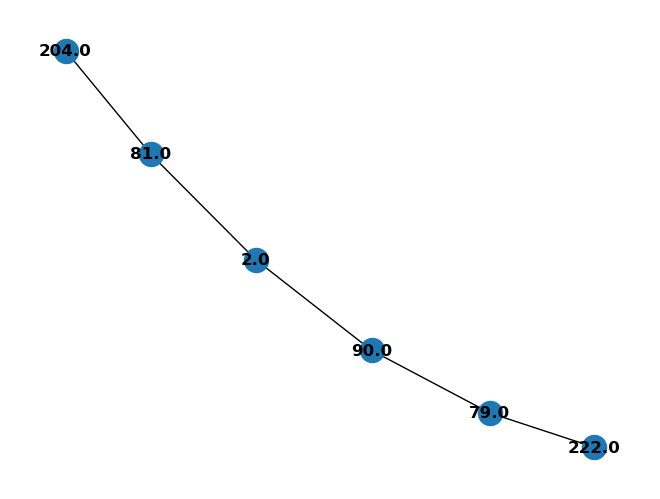

Induced graph for community 24 :


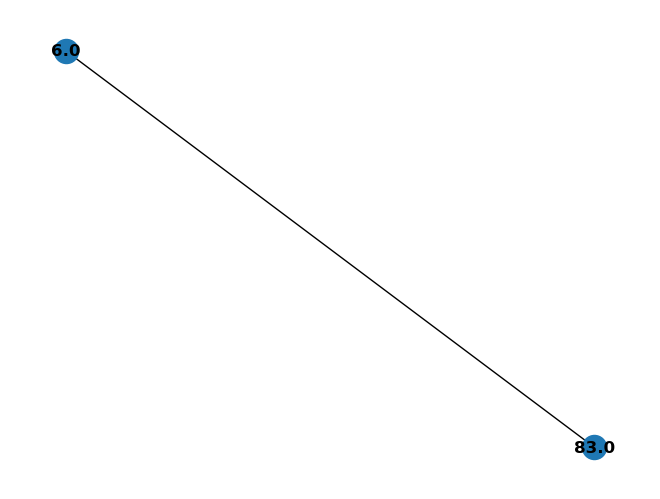

Induced graph for community 2 :


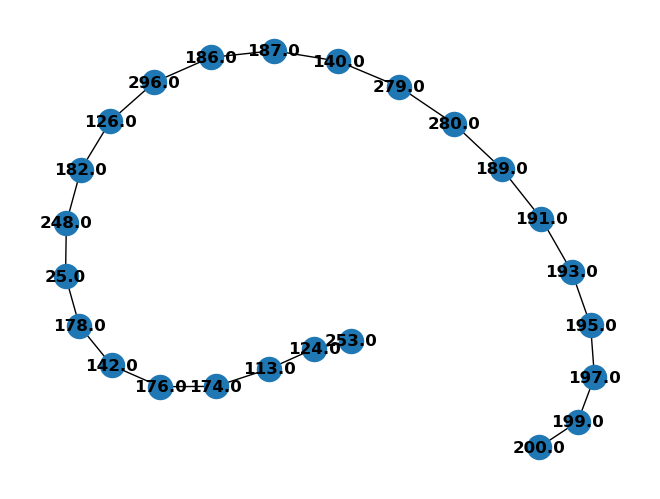

Induced graph for community 4 :


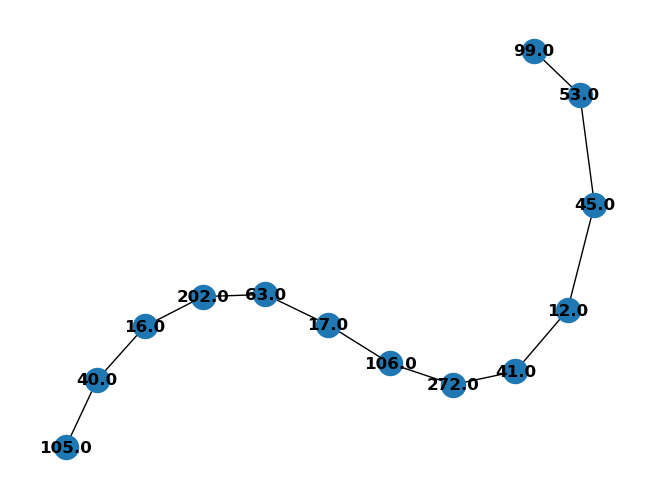

Induced graph for community 6 :


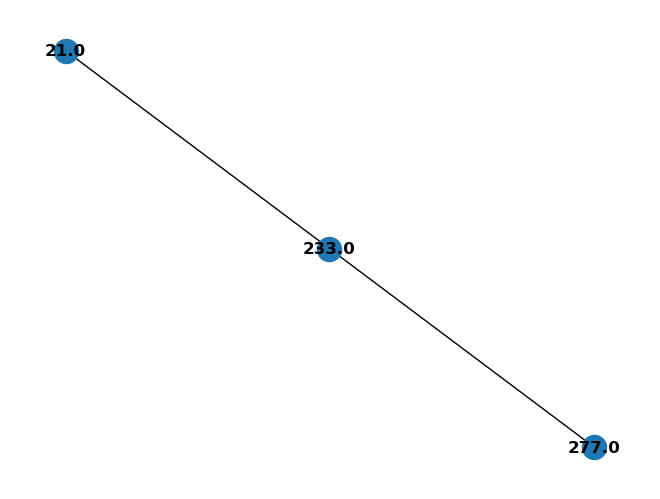

Induced graph for community 9 :


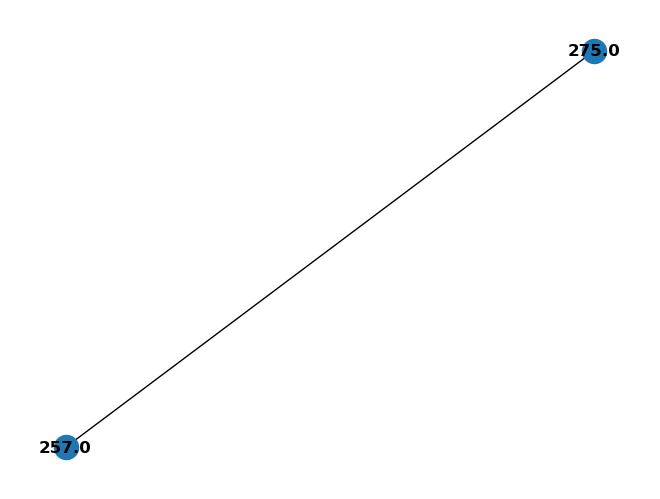

In [96]:
for community_id, subgraph in subgraphs.items():
    print("Induced graph for community", community_id, ":")
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos=pos, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(subgraph, pos=pos, edge_labels=nx.get_edge_attributes(subgraph, 'weight'))
    plt.show()

In [94]:
print("Community", community_id, ":", communities[community_id])
print("Subgraph:", subgraph.edges())

Community 0 : [73.0, 5.0, 154.0, 263.0, 56.0, 96.0, 42.0, 58.0, 95.0, 72.0, 271.0, 68.0, 203.0, 80.0, 97.0, 28.0, 57.0, 55.0, 223.0]
Subgraph: [(73.0, 5.0), (5.0, 154.0), (154.0, 263.0), (263.0, 56.0), (56.0, 96.0), (96.0, 42.0), (42.0, 58.0), (58.0, 95.0), (95.0, 72.0), (72.0, 271.0), (271.0, 68.0), (68.0, 97.0), (68.0, 57.0), (203.0, 80.0), (80.0, 97.0), (97.0, 28.0), (28.0, 57.0), (57.0, 55.0), (55.0, 223.0)]


In [95]:
community_dict = {community_id: subgraphs[community_id].edges() for community_id in subgraphs}
community_dict[0]

EdgeView([(73.0, 5.0), (5.0, 154.0), (154.0, 263.0), (263.0, 56.0), (56.0, 96.0), (96.0, 42.0), (42.0, 58.0), (58.0, 95.0), (95.0, 72.0), (72.0, 271.0), (271.0, 68.0), (68.0, 97.0), (68.0, 57.0), (203.0, 80.0), (80.0, 97.0), (97.0, 28.0), (28.0, 57.0), (57.0, 55.0), (55.0, 223.0)])

In [31]:
data = np.load(flow_file)
TS = data['data']

In [33]:
#flow,occupy and speed
flow = TS[:,0,0]/TS[:,0,0].max()
occupy = TS[:,0,1]/TS[:,0,1].max()
speed = TS[:,0,2]/TS[:,0,2].max()

In [34]:
flow.max()

1.0

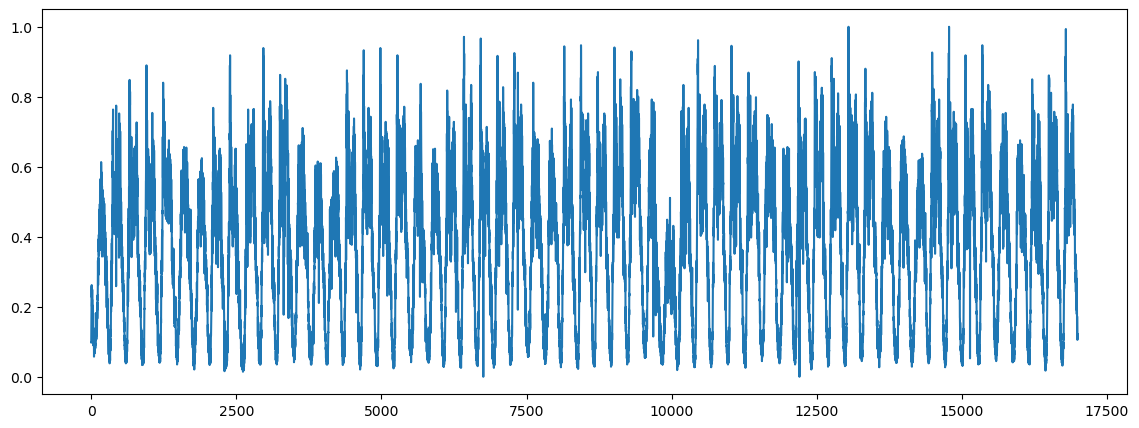

In [35]:
plt.figure(figsize=(14, 5))

plt.plot(flow)

plt.show()

In [36]:
df2= pd.DataFrame({"flow":flow,"occupy":occupy, "speed":speed })

In [37]:
df2

,flow,occupy,speed
0,0.099042,0.025106,0.950980
1,0.097444,0.024128,0.942577
2,0.113419,0.030323,0.957983
3,0.137380,0.036518,0.949580
4,0.164537,0.046951,0.943978
...,...,...,...
16987,0.108626,0.030323,0.949580
16988,0.119808,0.032605,0.949580
16989,0.105431,0.029019,0.949580
16990,0.123003,0.033583,0.943978


In [38]:
start_date = "2018-01-01 00:00:00"
end_date = "2018-02-28 23:55:00"
interval = "5min"
index = pd.date_range(start=start_date, end=end_date, freq=interval)

In [41]:
df2.set_index(index)

,flow,occupy,speed
2018-01-01 00:00:00,0.099042,0.025106,0.950980
2018-01-01 00:05:00,0.097444,0.024128,0.942577
2018-01-01 00:10:00,0.113419,0.030323,0.957983
2018-01-01 00:15:00,0.137380,0.036518,0.949580
2018-01-01 00:20:00,0.164537,0.046951,0.943978
...,...,...,...
2018-02-28 23:35:00,0.108626,0.030323,0.949580
2018-02-28 23:40:00,0.119808,0.032605,0.949580
2018-02-28 23:45:00,0.105431,0.029019,0.949580
2018-02-28 23:50:00,0.123003,0.033583,0.943978


<AxesSubplot:>

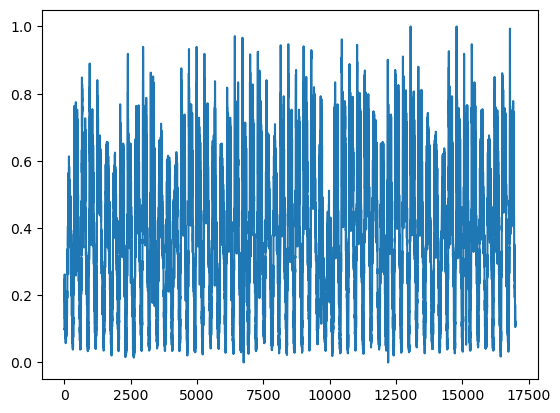

In [97]:
df2.flow.plot()

In [1]:
import networkx as nx
from networkx.algorithms.shortest_paths.generic import shortest_path_length

# Create a graph with weighted edges
G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 3), (1, 3, 2), (2, 4, 1), (2, 5, 4), (3, 6, 5), (3, 7, 2), (4, 8, 2), (5, 9, 1)])

# Compute shortest distances from node 1 to all other nodes
distances = shortest_path_length(G, source=1, weight='weight')

# Sort distances in ascending order and get the 5 smallest ones (excluding node 1)
nearest_neighbors = sorted(distances.items(), key=lambda x: x[1])[1:6]

print(nearest_neighbors)

[(3, 2), (2, 3), (7, 4), (4, 4), (8, 6)]


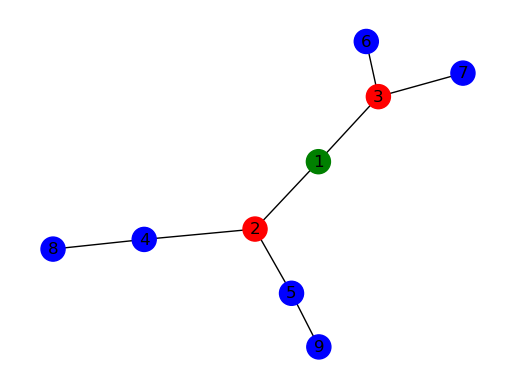

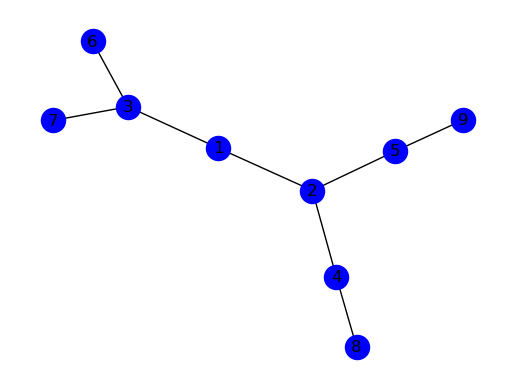

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph with some edges
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (4, 8), (5, 9)])

# Get the 5 nearest neighbors of node 1
neighbors = set(nx.neighbors(G, 1))
neighbor_colors = ['r' if n in neighbors  else 'g' if n==1  else 'b' for n in G.nodes()]

# Plot the graph with different colors for the neighbors
fig, ax = plt.subplots()   # create a new set of subplots
nx.draw(G, with_labels=True, node_color=neighbor_colors, ax=ax)   # plot on the same set of subplots
fig, ax = plt.subplots()   # create another new set of subplots
nx.draw(G, with_labels=True, node_color='b', ax=ax)   # plot on the new set of subplots

plt.show()

